In [2]:
%matplotlib notebook

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
US_videos = pd.read_csv('trending_on_youtube/USvideos.csv', encoding = 'iso-8859-1')
US_category_id = pd.read_csv('trending_on_youtube/US_category_ID_JSON_converted.csv', encoding = 'iso-8859-1')
US_videos.head()

,video_id,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO Ð¦ \n\nSUBSCRIBE Ð¼ ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
del US_videos['description']
del US_videos['video_id']

In [6]:
US_videos.head()

,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False


In [7]:
US_videos = US_videos.dropna(how='any')

In [8]:
US_videos.count()

trending_date             40949
title                     40949
channel_title             40949
id                        40949
publish_time              40949
tags                      40949
views                     40949
likes                     40949
dislikes                  40949
comment_count             40949
thumbnail_link            40949
comments_disabled         40949
ratings_disabled          40949
video_error_or_removed    40949
dtype: int64

In [9]:
US_videos_categories = pd.merge(US_videos, US_category_id, on = ["id"], how = 'left')
del US_videos_categories['kind']
US_videos_categories

,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,etag,snippet/channelId,snippet/title,snippet/assignable
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
5,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
6,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
7,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
8,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
9,17.14.11,Why the rise of the robots wonÛªt mean the en...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/QiLK0ZIrFoORdk_g2...",UCBR8-60-B28hp2BmDPdntcQ,News & Politics,True


In [10]:
sort_by_views = US_videos_categories.sort_values('views', ascending=False)
US_videos_categories.head()

,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,etag,snippet/channelId,snippet/title,snippet/assignable
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


In [11]:
US_videos_categories= US_videos_categories.rename(columns={"snippet/channelId": "Channel ID", "snippet/title": "Category", "snippet/assignable": "Assignable"})

US_videos_categories.head()

,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,etag,Channel ID,Category,Assignable
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


In [22]:
US_videos_categories.groupby("Category")["channel_title"].count()

Category
Autos & Vehicles          384
Comedy                   3457
Education                1656
Entertainment            9964
Film & Animation         2345
Gaming                    817
Howto & Style            4146
Music                    6472
News & Politics          2487
Nonprofits & Activism      57
People & Blogs           3210
Pets & Animals            920
Science & Technology     2401
Shows                      57
Sports                   2174
Travel & Events           402
Name: channel_title, dtype: int64

<IPython.core.display.Javascript object>


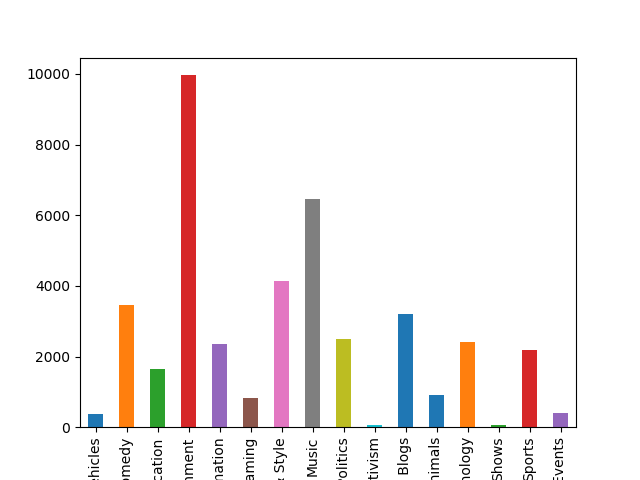

In [23]:
US_videos_categories.groupby("Category")["channel_title"].count().plot.bar()

In [64]:
US_videos_categories.to_excel("output.xlsx")